# Results

In [1]:
from torch.autograd import Variable

import VAE_NN
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch

In [3]:
from torch.optim import Adam

In [9]:
test = VAE_NN.VAE_Net(latent_size=2)

In [96]:
test = test.cuda()

In [11]:
optimizer = Adam(test.parameters(),lr=1e-3)

In [12]:
train_data,_ = VAE_NN.get_data_loaders(b_size=100)

In [13]:
import time

In [14]:
t = time.time()
ep = 10
VAE_NN.train(test,optimizer,train_data, VAE_NN.elbo_loss, epochs = ep)
t_e = time.time() - t
print('Seconds for %d epcohs: %d' % (ep,t_e))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 0 [0/60000 (0%)]	Loss: 55278.375000
Train Epoch: 0 [10000/60000 (17%)]	Loss: 19361.300781
Train Epoch: 0 [20000/60000 (33%)]	Loss: 19032.992188
Train Epoch: 0 [30000/60000 (50%)]	Loss: 17445.218750
Train Epoch: 0 [40000/60000 (67%)]	Loss: 17857.664062
Train Epoch: 0 [50000/60000 (83%)]	Loss: 18377.402344


 10%|█         | 1/10 [00:07<01:08,  7.65s/it]

Train Epoch: 1 [0/60000 (0%)]	Loss: 17367.062500
Train Epoch: 1 [10000/60000 (17%)]	Loss: 17202.212891
Train Epoch: 1 [20000/60000 (33%)]	Loss: 17115.671875
Train Epoch: 1 [30000/60000 (50%)]	Loss: 17150.017578
Train Epoch: 1 [40000/60000 (67%)]	Loss: 17846.007812
Train Epoch: 1 [50000/60000 (83%)]	Loss: 17717.294922


 20%|██        | 2/10 [00:15<01:00,  7.55s/it]

Train Epoch: 2 [0/60000 (0%)]	Loss: 17809.005859
Train Epoch: 2 [10000/60000 (17%)]	Loss: 17781.851562
Train Epoch: 2 [20000/60000 (33%)]	Loss: 17309.763672
Train Epoch: 2 [30000/60000 (50%)]	Loss: 15719.385742
Train Epoch: 2 [40000/60000 (67%)]	Loss: 17754.654297
Train Epoch: 2 [50000/60000 (83%)]	Loss: 16459.626953


 30%|███       | 3/10 [00:22<00:53,  7.63s/it]

Train Epoch: 3 [0/60000 (0%)]	Loss: 16935.365234
Train Epoch: 3 [10000/60000 (17%)]	Loss: 16807.691406
Train Epoch: 3 [20000/60000 (33%)]	Loss: 17463.998047
Train Epoch: 3 [30000/60000 (50%)]	Loss: 16176.431641
Train Epoch: 3 [40000/60000 (67%)]	Loss: 17060.068359
Train Epoch: 3 [50000/60000 (83%)]	Loss: 16802.263672


 40%|████      | 4/10 [00:30<00:46,  7.67s/it]

Train Epoch: 4 [0/60000 (0%)]	Loss: 16807.669922
Train Epoch: 4 [10000/60000 (17%)]	Loss: 17285.953125
Train Epoch: 4 [20000/60000 (33%)]	Loss: 15796.418945
Train Epoch: 4 [30000/60000 (50%)]	Loss: 16307.500000
Train Epoch: 4 [40000/60000 (67%)]	Loss: 16853.705078
Train Epoch: 4 [50000/60000 (83%)]	Loss: 16739.542969


 50%|█████     | 5/10 [00:38<00:38,  7.62s/it]

Train Epoch: 5 [0/60000 (0%)]	Loss: 17165.519531
Train Epoch: 5 [10000/60000 (17%)]	Loss: 16156.171875
Train Epoch: 5 [20000/60000 (33%)]	Loss: 17282.826172
Train Epoch: 5 [30000/60000 (50%)]	Loss: 16775.787109
Train Epoch: 5 [40000/60000 (67%)]	Loss: 15713.130859
Train Epoch: 5 [50000/60000 (83%)]	Loss: 16108.893555


 60%|██████    | 6/10 [00:45<00:30,  7.60s/it]

Train Epoch: 6 [0/60000 (0%)]	Loss: 15963.620117
Train Epoch: 6 [10000/60000 (17%)]	Loss: 16536.320312
Train Epoch: 6 [20000/60000 (33%)]	Loss: 15516.935547
Train Epoch: 6 [30000/60000 (50%)]	Loss: 17013.136719
Train Epoch: 6 [40000/60000 (67%)]	Loss: 16116.565430
Train Epoch: 6 [50000/60000 (83%)]	Loss: 16231.879883


 70%|███████   | 7/10 [00:52<00:22,  7.54s/it]

Train Epoch: 7 [0/60000 (0%)]	Loss: 16021.065430
Train Epoch: 7 [10000/60000 (17%)]	Loss: 16019.290039
Train Epoch: 7 [20000/60000 (33%)]	Loss: 16102.138672
Train Epoch: 7 [30000/60000 (50%)]	Loss: 15310.344727
Train Epoch: 7 [40000/60000 (67%)]	Loss: 15608.735352
Train Epoch: 7 [50000/60000 (83%)]	Loss: 14664.709961


 80%|████████  | 8/10 [01:00<00:15,  7.51s/it]

Train Epoch: 8 [0/60000 (0%)]	Loss: 15737.388672
Train Epoch: 8 [10000/60000 (17%)]	Loss: 15212.283203
Train Epoch: 8 [20000/60000 (33%)]	Loss: 15867.033203
Train Epoch: 8 [30000/60000 (50%)]	Loss: 15155.826172
Train Epoch: 8 [40000/60000 (67%)]	Loss: 15527.106445
Train Epoch: 8 [50000/60000 (83%)]	Loss: 16029.672852


 90%|█████████ | 9/10 [01:07<00:07,  7.49s/it]

Train Epoch: 9 [0/60000 (0%)]	Loss: 16546.521484
Train Epoch: 9 [10000/60000 (17%)]	Loss: 15673.740234
Train Epoch: 9 [20000/60000 (33%)]	Loss: 15914.699219
Train Epoch: 9 [30000/60000 (50%)]	Loss: 15259.333984
Train Epoch: 9 [40000/60000 (67%)]	Loss: 15869.742188
Train Epoch: 9 [50000/60000 (83%)]	Loss: 14841.983398


100%|██████████| 10/10 [01:14<00:00,  7.48s/it]

Seconds for 10 epcohs: 74


In [15]:
t_data,_ = next(iter(train_data))

In [16]:
t_data = Variable(t_data).view(-1,784)

In [17]:
i = 3

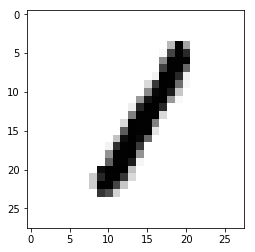

In [69]:
plt.imshow(np.reshape(t_data[i].data.cpu().numpy(),(28,28)), cmap='gray_r')
plt.show()

Try to reconstruct the above:

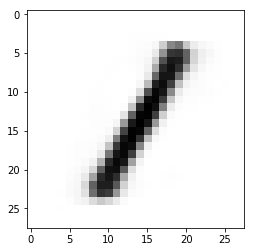

In [67]:
a,_,b,c = test(t_data[i].cuda())

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray_r')
plt.show()

The below generates an image from white noise

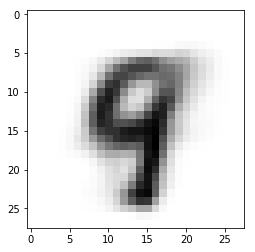

In [76]:
a = test.sample()

a,b = test.decode(a)

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray_r')
plt.show()

# Random Stuff

In [32]:
a = torch.FloatTensor()

In [36]:
torch.cat((a,torch.cat(test.ei.weight.data)))


 1.7375e-02
 1.3542e-02
-8.7075e-03
     ⋮     
-1.4102e-02
 1.2178e-03
 1.7805e-02
[torch.FloatTensor of size 392000]

In [31]:
type(torch.cat((test.ei.weight.data, test.ei.weight.data),dim=1))

torch.FloatTensor

In [30]:
list(test.children())

[Linear(in_features=784, out_features=500),
 Linear(in_features=500, out_features=20),
 Linear(in_features=500, out_features=20),
 Linear(in_features=20, out_features=500),
 Linear(in_features=500, out_features=784),
 Linear(in_features=500, out_features=784)]

In [13]:
params = []
    
for layer in test.children():
    params.append(torch.cat(layer.weight.data))

In [16]:
params = torch.cat(params)

In [28]:
type((params**2).sum())

float

In [21]:
params.pow(2).sum()

867.1249624084944

In [ ]:
-0.5*(params**2).sum()#

In [30]:
-params.size()[0]*0.5*torch.Tensor([2*np.pi]).log().sum()

-1108239.8521900177

# Let's get those plots

linearly spaced coordinates on the unit square were transformed through the inverse CDF of the Gaussian to produce values of the latent variables z. For each of these values z, we plotted the corresponding generative pθ(x|z) with the learned parameters θ.

## MNIST

In [139]:
test = VAE_NN.VAE_Net(latent_size=2)

In [140]:
test = test.cuda()

In [141]:
optimizer = Adam(test.parameters(),lr=1e-3)

In [ ]:
train_data,_ = VAE_NN.get_data_loaders(b_size=100)

In [ ]:
t = time.time()
ep = 10
VAE_NN.train(test,optimizer,train_data, VAE_NN.elbo_loss, epochs = ep)
t_e = time.time() - t
print('Seconds for %d epcohs: %d' % (ep,t_e))

  0%|          | 0/10 [00:00<?, ?it/s]

Train Epoch: 0 [0/60000 (0%)]	Loss: 56027.390625
Train Epoch: 0 [10000/60000 (17%)]	Loss: 20511.583984
Train Epoch: 0 [20000/60000 (33%)]	Loss: 18383.849609
Train Epoch: 0 [30000/60000 (50%)]	Loss: 17538.816406
Train Epoch: 0 [40000/60000 (67%)]	Loss: 18101.355469
Train Epoch: 0 [50000/60000 (83%)]	Loss: 17900.585938


 10%|█         | 1/10 [00:08<01:14,  8.29s/it]

Train Epoch: 1 [0/60000 (0%)]	Loss: 17055.689453
Train Epoch: 1 [10000/60000 (17%)]	Loss: 16652.210938
Train Epoch: 1 [20000/60000 (33%)]	Loss: 18600.365234
Train Epoch: 1 [30000/60000 (50%)]	Loss: 17590.312500
Train Epoch: 1 [40000/60000 (67%)]	Loss: 17002.371094
Train Epoch: 1 [50000/60000 (83%)]	Loss: 17044.330078


 20%|██        | 2/10 [00:16<01:06,  8.28s/it]

Train Epoch: 2 [0/60000 (0%)]	Loss: 16875.289062
Train Epoch: 2 [10000/60000 (17%)]	Loss: 16812.890625
Train Epoch: 2 [20000/60000 (33%)]	Loss: 17848.732422
Train Epoch: 2 [30000/60000 (50%)]	Loss: 16730.582031
Train Epoch: 2 [40000/60000 (67%)]	Loss: 16971.835938
Train Epoch: 2 [50000/60000 (83%)]	Loss: 16806.160156


 30%|███       | 3/10 [00:24<00:57,  8.25s/it]

Train Epoch: 3 [0/60000 (0%)]	Loss: 16936.148438
Train Epoch: 3 [10000/60000 (17%)]	Loss: 16566.683594
Train Epoch: 3 [20000/60000 (33%)]	Loss: 16259.180664
Train Epoch: 3 [30000/60000 (50%)]	Loss: 16868.269531
Train Epoch: 3 [40000/60000 (67%)]	Loss: 16581.083984
Train Epoch: 3 [50000/60000 (83%)]	Loss: 17610.332031


 40%|████      | 4/10 [00:33<00:49,  8.33s/it]

Train Epoch: 4 [0/60000 (0%)]	Loss: 16369.398438
Train Epoch: 4 [10000/60000 (17%)]	Loss: 16572.408203
Train Epoch: 4 [20000/60000 (33%)]	Loss: 17231.984375
Train Epoch: 4 [30000/60000 (50%)]	Loss: 16431.750000
Train Epoch: 4 [40000/60000 (67%)]	Loss: 16931.587891
Train Epoch: 4 [50000/60000 (83%)]	Loss: 15371.961914


 50%|█████     | 5/10 [00:41<00:41,  8.37s/it]

Train Epoch: 5 [0/60000 (0%)]	Loss: 16072.379883
Train Epoch: 5 [10000/60000 (17%)]	Loss: 15794.447266
Train Epoch: 5 [20000/60000 (33%)]	Loss: 15984.640625
Train Epoch: 5 [30000/60000 (50%)]	Loss: 15481.162109
Train Epoch: 5 [40000/60000 (67%)]	Loss: 15947.866211
Train Epoch: 5 [50000/60000 (83%)]	Loss: 15662.252930


 60%|██████    | 6/10 [00:50<00:33,  8.40s/it]

Train Epoch: 6 [0/60000 (0%)]	Loss: 15911.147461
Train Epoch: 6 [10000/60000 (17%)]	Loss: 16818.103516
Train Epoch: 6 [20000/60000 (33%)]	Loss: 16060.714844
Train Epoch: 6 [30000/60000 (50%)]	Loss: 16543.634766
Train Epoch: 6 [40000/60000 (67%)]	Loss: 15781.776367
Train Epoch: 6 [50000/60000 (83%)]	Loss: 15974.278320


 70%|███████   | 7/10 [00:59<00:25,  8.44s/it]

Train Epoch: 7 [0/60000 (0%)]	Loss: 15821.386719
Train Epoch: 7 [10000/60000 (17%)]	Loss: 15357.255859
Train Epoch: 7 [20000/60000 (33%)]	Loss: 16084.978516
Train Epoch: 7 [30000/60000 (50%)]	Loss: 16469.671875
Train Epoch: 7 [40000/60000 (67%)]	Loss: 16117.314453
Train Epoch: 7 [50000/60000 (83%)]	Loss: 15672.485352


 80%|████████  | 8/10 [01:07<00:16,  8.45s/it]

Train Epoch: 8 [0/60000 (0%)]	Loss: 15884.381836
Train Epoch: 8 [10000/60000 (17%)]	Loss: 16469.150391
Train Epoch: 8 [20000/60000 (33%)]	Loss: 15176.249023
Train Epoch: 8 [30000/60000 (50%)]	Loss: 15206.651367
Train Epoch: 8 [40000/60000 (67%)]	Loss: 14751.051758
Train Epoch: 8 [50000/60000 (83%)]	Loss: 16320.422852


 90%|█████████ | 9/10 [01:15<00:08,  8.44s/it]

Train Epoch: 9 [0/60000 (0%)]	Loss: 14712.162109
Train Epoch: 9 [10000/60000 (17%)]	Loss: 15430.089844


In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
grid = np.linspace(0+1e-4, 1-1e-4, 20)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize = (8,8))
gs1 = gridspec.GridSpec(20, 20)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

for i in range(20):
    for j in range(20):
        ax1 = plt.subplot(gs1[i,j])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        noise = Variable(torch.Tensor([norm.ppf(grid[i]),norm.ppf(grid[j])])).cuda()
        im,_ = test.decode(noise)
        im = im.data.cpu().numpy()
        plt.imshow(np.reshape(im,(28,28)),cmap='gray_r')
        plt.axis('off')
plt.savefig('./Images/MNIST.png')
plt.show()

## Frey face

In [120]:
test = VAE_NN.VAE_Net(latent_size=2,data='Frey')

In [121]:
test = test.cuda()

In [122]:
optimizer = Adam(test.parameters(),lr=1e-3)

In [126]:
train_data,_ = VAE_NN.get_data_loaders(b_size=100,data='Frey')

Data file frey_rawface.mat exists.


In [135]:
t = time.time()
ep = 500
VAE_NN.train(test,optimizer,train_data, VAE_NN.elbo_loss, epochs = ep)
t_e = time.time() - t
print('Seconds for %d epcohs: %d' % (ep,t_e))

  0%|          | 1/500 [00:00<02:27,  3.39it/s]

Train Epoch: 0 [0/1900 (0%)]	Loss: -111738.328125


  0%|          | 2/500 [00:00<02:04,  4.00it/s]

Train Epoch: 1 [0/1900 (0%)]	Loss: -114649.437500
Train Epoch: 2 [0/1900 (0%)]	Loss: -111760.609375


  1%|          | 4/500 [00:00<02:02,  4.04it/s]

Train Epoch: 3 [0/1900 (0%)]	Loss: -115025.609375


  1%|          | 5/500 [00:01<02:06,  3.92it/s]

Train Epoch: 4 [0/1900 (0%)]	Loss: -111712.164062


  1%|          | 6/500 [00:01<02:02,  4.04it/s]

Train Epoch: 5 [0/1900 (0%)]	Loss: -111335.164062
Train Epoch: 6 [0/1900 (0%)]	Loss: -115522.070312


  2%|▏         | 8/500 [00:01<01:58,  4.16it/s]

Train Epoch: 7 [0/1900 (0%)]	Loss: -114462.203125


  2%|▏         | 9/500 [00:02<02:00,  4.06it/s]

Train Epoch: 8 [0/1900 (0%)]	Loss: -114822.617188


  2%|▏         | 10/500 [00:02<01:58,  4.13it/s]

Train Epoch: 9 [0/1900 (0%)]	Loss: -113887.312500
Train Epoch: 10 [0/1900 (0%)]	Loss: -111860.968750


  2%|▏         | 12/500 [00:02<01:56,  4.18it/s]

Train Epoch: 11 [0/1900 (0%)]	Loss: -118112.703125


  3%|▎         | 13/500 [00:03<01:58,  4.11it/s]

Train Epoch: 12 [0/1900 (0%)]	Loss: -116396.656250


  3%|▎         | 14/500 [00:03<01:57,  4.15it/s]

Train Epoch: 13 [0/1900 (0%)]	Loss: -114665.304688
Train Epoch: 14 [0/1900 (0%)]	Loss: -111517.835938


  3%|▎         | 15/500 [00:03<01:55,  4.21it/s]

Train Epoch: 15 [0/1900 (0%)]	Loss: -114617.414062


  3%|▎         | 17/500 [00:04<01:54,  4.22it/s]

Train Epoch: 16 [0/1900 (0%)]	Loss: -112917.187500


  4%|▎         | 18/500 [00:04<01:54,  4.20it/s]

Train Epoch: 17 [0/1900 (0%)]	Loss: -114870.273438


  4%|▍         | 19/500 [00:04<01:53,  4.26it/s]

Train Epoch: 18 [0/1900 (0%)]	Loss: -116369.109375
Train Epoch: 19 [0/1900 (0%)]	Loss: -112970.234375


  4%|▍         | 20/500 [00:04<01:51,  4.31it/s]

Train Epoch: 20 [0/1900 (0%)]	Loss: -112898.812500


  4%|▍         | 21/500 [00:04<01:52,  4.27it/s]

Train Epoch: 21 [0/1900 (0%)]	Loss: -114958.718750


  5%|▍         | 23/500 [00:05<01:52,  4.24it/s]

Train Epoch: 22 [0/1900 (0%)]	Loss: -110160.742188
Train Epoch: 23 [0/1900 (0%)]	Loss: -110911.914062


  5%|▍         | 24/500 [00:05<01:50,  4.29it/s]

Train Epoch: 24 [0/1900 (0%)]	Loss: -112781.921875


  5%|▌         | 26/500 [00:06<01:51,  4.24it/s]

Train Epoch: 25 [0/1900 (0%)]	Loss: -109507.804688


  5%|▌         | 27/500 [00:06<01:51,  4.23it/s]

Train Epoch: 26 [0/1900 (0%)]	Loss: -114352.218750


  6%|▌         | 28/500 [00:06<01:50,  4.26it/s]

Train Epoch: 27 [0/1900 (0%)]	Loss: -113837.242188
Train Epoch: 28 [0/1900 (0%)]	Loss: -112872.171875


  6%|▌         | 30/500 [00:07<01:51,  4.23it/s]

Train Epoch: 29 [0/1900 (0%)]	Loss: -112954.906250


  6%|▌         | 31/500 [00:07<01:51,  4.22it/s]

Train Epoch: 30 [0/1900 (0%)]	Loss: -114549.320312


  6%|▋         | 32/500 [00:07<01:50,  4.25it/s]

Train Epoch: 31 [0/1900 (0%)]	Loss: -116486.882812
Train Epoch: 32 [0/1900 (0%)]	Loss: -115817.312500


  7%|▋         | 34/500 [00:08<01:49,  4.24it/s]

Train Epoch: 33 [0/1900 (0%)]	Loss: -110461.875000


  7%|▋         | 35/500 [00:08<01:50,  4.21it/s]

Train Epoch: 34 [0/1900 (0%)]	Loss: -114420.976562


  7%|▋         | 36/500 [00:08<01:49,  4.23it/s]

Train Epoch: 35 [0/1900 (0%)]	Loss: -116236.351562
Train Epoch: 36 [0/1900 (0%)]	Loss: -113730.445312


  8%|▊         | 38/500 [00:08<01:49,  4.23it/s]

Train Epoch: 37 [0/1900 (0%)]	Loss: -112741.492188


  8%|▊         | 39/500 [00:09<01:49,  4.21it/s]

Train Epoch: 38 [0/1900 (0%)]	Loss: -116703.492188


  8%|▊         | 40/500 [00:09<01:48,  4.23it/s]

Train Epoch: 39 [0/1900 (0%)]	Loss: -115140.015625
Train Epoch: 40 [0/1900 (0%)]	Loss: -115259.304688


  8%|▊         | 41/500 [00:09<01:47,  4.26it/s]

Train Epoch: 41 [0/1900 (0%)]	Loss: -115017.351562


  9%|▊         | 43/500 [00:10<01:48,  4.22it/s]

Train Epoch: 42 [0/1900 (0%)]	Loss: -116924.492188


  9%|▉         | 44/500 [00:10<01:48,  4.22it/s]

Train Epoch: 43 [0/1900 (0%)]	Loss: -116991.406250


  9%|▉         | 45/500 [00:10<01:47,  4.24it/s]

Train Epoch: 44 [0/1900 (0%)]	Loss: -112611.289062


  9%|▉         | 46/500 [00:10<01:47,  4.23it/s]

Train Epoch: 45 [0/1900 (0%)]	Loss: -113010.390625


  9%|▉         | 47/500 [00:11<01:47,  4.21it/s]

Train Epoch: 46 [0/1900 (0%)]	Loss: -113712.851562


 10%|▉         | 48/500 [00:11<01:47,  4.21it/s]

Train Epoch: 47 [0/1900 (0%)]	Loss: -115031.726562


 10%|▉         | 49/500 [00:11<01:46,  4.23it/s]

Train Epoch: 48 [0/1900 (0%)]	Loss: -113223.039062
Train Epoch: 49 [0/1900 (0%)]	Loss: -113193.726562


 10%|█         | 51/500 [00:12<01:46,  4.21it/s]

Train Epoch: 50 [0/1900 (0%)]	Loss: -115142.046875


 10%|█         | 52/500 [00:12<01:46,  4.21it/s]

Train Epoch: 51 [0/1900 (0%)]	Loss: -115863.460938


 11%|█         | 53/500 [00:12<01:45,  4.22it/s]

Train Epoch: 52 [0/1900 (0%)]	Loss: -117902.085938
Train Epoch: 53 [0/1900 (0%)]	Loss: -116482.210938


 11%|█         | 55/500 [00:13<01:45,  4.22it/s]

Train Epoch: 54 [0/1900 (0%)]	Loss: -114939.429688


 11%|█         | 56/500 [00:13<01:45,  4.21it/s]

Train Epoch: 55 [0/1900 (0%)]	Loss: -113673.320312


 11%|█▏        | 57/500 [00:13<01:44,  4.22it/s]

Train Epoch: 56 [0/1900 (0%)]	Loss: -118615.242188
Train Epoch: 57 [0/1900 (0%)]	Loss: -114593.328125


 12%|█▏        | 58/500 [00:13<01:44,  4.24it/s]

Train Epoch: 58 [0/1900 (0%)]	Loss: -114681.226562


 12%|█▏        | 60/500 [00:14<01:44,  4.22it/s]

Train Epoch: 59 [0/1900 (0%)]	Loss: -112512.046875


 12%|█▏        | 61/500 [00:14<01:43,  4.23it/s]

Train Epoch: 60 [0/1900 (0%)]	Loss: -111780.476562
Train Epoch: 61 [0/1900 (0%)]	Loss: -112951.890625


 12%|█▏        | 62/500 [00:14<01:43,  4.24it/s]

Train Epoch: 62 [0/1900 (0%)]	Loss: -114373.460938


 13%|█▎        | 64/500 [00:15<01:43,  4.23it/s]

Train Epoch: 63 [0/1900 (0%)]	Loss: -115112.601562


 13%|█▎        | 65/500 [00:15<01:43,  4.22it/s]

Train Epoch: 64 [0/1900 (0%)]	Loss: -117124.304688


 13%|█▎        | 66/500 [00:15<01:42,  4.24it/s]

Train Epoch: 65 [0/1900 (0%)]	Loss: -113159.609375
Train Epoch: 66 [0/1900 (0%)]	Loss: -116860.585938


 14%|█▎        | 68/500 [00:16<01:42,  4.21it/s]

Train Epoch: 67 [0/1900 (0%)]	Loss: -114557.265625


 14%|█▍        | 69/500 [00:16<01:42,  4.20it/s]

Train Epoch: 68 [0/1900 (0%)]	Loss: -114208.976562


 14%|█▍        | 70/500 [00:16<01:42,  4.21it/s]

Train Epoch: 69 [0/1900 (0%)]	Loss: -111518.765625


 14%|█▍        | 71/500 [00:16<01:41,  4.21it/s]

Train Epoch: 70 [0/1900 (0%)]	Loss: -114559.875000


 14%|█▍        | 72/500 [00:17<01:42,  4.19it/s]

Train Epoch: 71 [0/1900 (0%)]	Loss: -116660.156250


 15%|█▍        | 73/500 [00:17<01:41,  4.20it/s]

Train Epoch: 72 [0/1900 (0%)]	Loss: -115989.031250
Train Epoch: 73 [0/1900 (0%)]	Loss: -118642.750000


 15%|█▍        | 74/500 [00:17<01:41,  4.21it/s]

Train Epoch: 74 [0/1900 (0%)]	Loss: -115923.617188


 15%|█▌        | 76/500 [00:18<01:40,  4.20it/s]

Train Epoch: 75 [0/1900 (0%)]	Loss: -114994.062500


 15%|█▌        | 77/500 [00:18<01:40,  4.20it/s]

Train Epoch: 76 [0/1900 (0%)]	Loss: -113801.312500


 16%|█▌        | 78/500 [00:18<01:40,  4.21it/s]

Train Epoch: 77 [0/1900 (0%)]	Loss: -115552.437500
Train Epoch: 78 [0/1900 (0%)]	Loss: -114303.773438


 16%|█▌        | 80/500 [00:19<01:40,  4.18it/s]

Train Epoch: 79 [0/1900 (0%)]	Loss: -118725.078125


 16%|█▌        | 81/500 [00:19<01:40,  4.18it/s]

Train Epoch: 80 [0/1900 (0%)]	Loss: -115977.648438
Train Epoch: 81 [0/1900 (0%)]	Loss: -117266.765625


 16%|█▋        | 82/500 [00:19<01:39,  4.20it/s]

Train Epoch: 82 [0/1900 (0%)]	Loss: -112228.882812


 17%|█▋        | 84/500 [00:20<01:39,  4.19it/s]

Train Epoch: 83 [0/1900 (0%)]	Loss: -114020.414062


 17%|█▋        | 85/500 [00:20<01:39,  4.18it/s]

Train Epoch: 84 [0/1900 (0%)]	Loss: -114328.546875


 17%|█▋        | 86/500 [00:20<01:38,  4.19it/s]

Train Epoch: 85 [0/1900 (0%)]	Loss: -117617.132812
Train Epoch: 86 [0/1900 (0%)]	Loss: -119444.093750


 18%|█▊        | 88/500 [00:21<01:38,  4.19it/s]

Train Epoch: 87 [0/1900 (0%)]	Loss: -117840.562500


 18%|█▊        | 89/500 [00:21<01:38,  4.18it/s]

Train Epoch: 88 [0/1900 (0%)]	Loss: -116817.484375


 18%|█▊        | 90/500 [00:21<01:37,  4.19it/s]

Train Epoch: 89 [0/1900 (0%)]	Loss: -114154.125000
Train Epoch: 90 [0/1900 (0%)]	Loss: -116551.093750


 18%|█▊        | 92/500 [00:21<01:37,  4.18it/s]

Train Epoch: 91 [0/1900 (0%)]	Loss: -117973.734375


 19%|█▊        | 93/500 [00:22<01:37,  4.17it/s]

Train Epoch: 92 [0/1900 (0%)]	Loss: -116446.929688


 19%|█▉        | 94/500 [00:22<01:37,  4.18it/s]

Train Epoch: 93 [0/1900 (0%)]	Loss: -114716.851562
Train Epoch: 94 [0/1900 (0%)]	Loss: -115254.164062


 19%|█▉        | 95/500 [00:22<01:36,  4.20it/s]

Train Epoch: 95 [0/1900 (0%)]	Loss: -117127.890625


 19%|█▉        | 97/500 [00:23<01:36,  4.19it/s]

Train Epoch: 96 [0/1900 (0%)]	Loss: -118286.664062


 20%|█▉        | 98/500 [00:23<01:35,  4.20it/s]

Train Epoch: 97 [0/1900 (0%)]	Loss: -115428.351562
Train Epoch: 98 [0/1900 (0%)]	Loss: -115231.242188


 20%|█▉        | 99/500 [00:23<01:35,  4.21it/s]

Train Epoch: 99 [0/1900 (0%)]	Loss: -113801.515625


 20%|██        | 101/500 [00:24<01:35,  4.20it/s]

Train Epoch: 100 [0/1900 (0%)]	Loss: -118312.171875


 20%|██        | 102/500 [00:24<01:34,  4.19it/s]

Train Epoch: 101 [0/1900 (0%)]	Loss: -120391.132812


 21%|██        | 103/500 [00:24<01:34,  4.20it/s]

Train Epoch: 102 [0/1900 (0%)]	Loss: -119262.812500
Train Epoch: 103 [0/1900 (0%)]	Loss: -112794.296875


 21%|██        | 105/500 [00:24<01:33,  4.21it/s]

Train Epoch: 104 [0/1900 (0%)]	Loss: -118044.937500
Train Epoch: 105 [0/1900 (0%)]	Loss: -116318.375000


 21%|██▏       | 107/500 [00:25<01:33,  4.20it/s]

Train Epoch: 106 [0/1900 (0%)]	Loss: -119105.015625
Train Epoch: 107 [0/1900 (0%)]	Loss: -116246.273438


 22%|██▏       | 109/500 [00:25<01:32,  4.21it/s]

Train Epoch: 108 [0/1900 (0%)]	Loss: -118262.273438


 22%|██▏       | 110/500 [00:26<01:32,  4.21it/s]

Train Epoch: 109 [0/1900 (0%)]	Loss: -116284.156250


 22%|██▏       | 111/500 [00:26<01:32,  4.21it/s]

Train Epoch: 110 [0/1900 (0%)]	Loss: -121207.476562


 22%|██▏       | 112/500 [00:26<01:32,  4.22it/s]

Train Epoch: 111 [0/1900 (0%)]	Loss: -118460.257812
Train Epoch: 112 [0/1900 (0%)]	Loss: -118935.429688


 23%|██▎       | 114/500 [00:27<01:31,  4.21it/s]

Train Epoch: 113 [0/1900 (0%)]	Loss: -114386.171875


 23%|██▎       | 115/500 [00:27<01:31,  4.21it/s]

Train Epoch: 114 [0/1900 (0%)]	Loss: -121092.242188


 23%|██▎       | 116/500 [00:27<01:31,  4.22it/s]

Train Epoch: 115 [0/1900 (0%)]	Loss: -114380.820312


 23%|██▎       | 117/500 [00:27<01:30,  4.22it/s]

Train Epoch: 116 [0/1900 (0%)]	Loss: -119594.273438


 24%|██▎       | 118/500 [00:28<01:30,  4.21it/s]

Train Epoch: 117 [0/1900 (0%)]	Loss: -119547.687500


 24%|██▍       | 119/500 [00:28<01:30,  4.21it/s]

Train Epoch: 118 [0/1900 (0%)]	Loss: -120445.898438


 24%|██▍       | 120/500 [00:28<01:30,  4.21it/s]

Train Epoch: 119 [0/1900 (0%)]	Loss: -117602.226562
Train Epoch: 120 [0/1900 (0%)]	Loss: -118820.007812


 24%|██▍       | 122/500 [00:28<01:29,  4.22it/s]

Train Epoch: 121 [0/1900 (0%)]	Loss: -116477.343750


 25%|██▍       | 123/500 [00:29<01:29,  4.21it/s]

Train Epoch: 122 [0/1900 (0%)]	Loss: -115588.226562


 25%|██▍       | 124/500 [00:29<01:29,  4.21it/s]

Train Epoch: 123 [0/1900 (0%)]	Loss: -115674.671875
Train Epoch: 124 [0/1900 (0%)]	Loss: -117822.078125


 25%|██▌       | 126/500 [00:29<01:28,  4.22it/s]

Train Epoch: 125 [0/1900 (0%)]	Loss: -120824.945312


 25%|██▌       | 127/500 [00:30<01:28,  4.21it/s]

Train Epoch: 126 [0/1900 (0%)]	Loss: -121190.460938


 26%|██▌       | 128/500 [00:30<01:28,  4.21it/s]

Train Epoch: 127 [0/1900 (0%)]	Loss: -118782.781250
Train Epoch: 128 [0/1900 (0%)]	Loss: -118659.976562


 26%|██▌       | 129/500 [00:30<01:27,  4.22it/s]

Train Epoch: 129 [0/1900 (0%)]	Loss: -121618.953125


 26%|██▌       | 131/500 [00:31<01:27,  4.22it/s]

Train Epoch: 130 [0/1900 (0%)]	Loss: -119810.757812


 26%|██▋       | 132/500 [00:31<01:27,  4.21it/s]

Train Epoch: 131 [0/1900 (0%)]	Loss: -116053.585938


 27%|██▋       | 133/500 [00:31<01:26,  4.22it/s]

Train Epoch: 132 [0/1900 (0%)]	Loss: -118489.695312
Train Epoch: 133 [0/1900 (0%)]	Loss: -118077.132812


 27%|██▋       | 135/500 [00:32<01:26,  4.21it/s]

Train Epoch: 134 [0/1900 (0%)]	Loss: -119211.968750


 27%|██▋       | 136/500 [00:32<01:26,  4.21it/s]

Train Epoch: 135 [0/1900 (0%)]	Loss: -118389.476562


 27%|██▋       | 137/500 [00:32<01:26,  4.22it/s]

Train Epoch: 136 [0/1900 (0%)]	Loss: -117903.000000
Train Epoch: 137 [0/1900 (0%)]	Loss: -116573.460938


 28%|██▊       | 139/500 [00:32<01:25,  4.22it/s]

Train Epoch: 138 [0/1900 (0%)]	Loss: -118899.367188


 28%|██▊       | 140/500 [00:33<01:25,  4.21it/s]

Train Epoch: 139 [0/1900 (0%)]	Loss: -119430.078125


 28%|██▊       | 141/500 [00:33<01:25,  4.22it/s]

Train Epoch: 140 [0/1900 (0%)]	Loss: -114701.203125
Train Epoch: 141 [0/1900 (0%)]	Loss: -120601.710938


 28%|██▊       | 142/500 [00:33<01:24,  4.23it/s]

Train Epoch: 142 [0/1900 (0%)]	Loss: -118246.187500


 29%|██▉       | 144/500 [00:34<01:24,  4.22it/s]

Train Epoch: 143 [0/1900 (0%)]	Loss: -121471.507812


 29%|██▉       | 145/500 [00:34<01:24,  4.22it/s]

Train Epoch: 144 [0/1900 (0%)]	Loss: -117123.507812


 29%|██▉       | 146/500 [00:34<01:23,  4.23it/s]

Train Epoch: 145 [0/1900 (0%)]	Loss: -122500.906250
Train Epoch: 146 [0/1900 (0%)]	Loss: -117384.859375


 30%|██▉       | 148/500 [00:34<01:23,  4.23it/s]

Train Epoch: 147 [0/1900 (0%)]	Loss: -120444.875000


 30%|██▉       | 149/500 [00:35<01:23,  4.22it/s]

Train Epoch: 148 [0/1900 (0%)]	Loss: -120596.437500


 30%|███       | 150/500 [00:35<01:22,  4.23it/s]

Train Epoch: 149 [0/1900 (0%)]	Loss: -118120.054688
Train Epoch: 150 [0/1900 (0%)]	Loss: -119526.382812


 30%|███       | 151/500 [00:35<01:22,  4.24it/s]

Train Epoch: 151 [0/1900 (0%)]	Loss: -118680.234375


 31%|███       | 153/500 [00:36<01:21,  4.23it/s]

Train Epoch: 152 [0/1900 (0%)]	Loss: -119838.218750


 31%|███       | 154/500 [00:36<01:21,  4.23it/s]

Train Epoch: 153 [0/1900 (0%)]	Loss: -120558.476562
Train Epoch: 154 [0/1900 (0%)]	Loss: -122563.710938


 31%|███       | 156/500 [00:36<01:21,  4.24it/s]

Train Epoch: 155 [0/1900 (0%)]	Loss: -118420.601562


 31%|███▏      | 157/500 [00:37<01:21,  4.23it/s]

Train Epoch: 156 [0/1900 (0%)]	Loss: -120812.125000


 32%|███▏      | 158/500 [00:37<01:20,  4.23it/s]

Train Epoch: 157 [0/1900 (0%)]	Loss: -122771.906250


 32%|███▏      | 159/500 [00:37<01:20,  4.24it/s]

Train Epoch: 158 [0/1900 (0%)]	Loss: -122348.835938
Train Epoch: 159 [0/1900 (0%)]	Loss: -119708.515625


 32%|███▏      | 161/500 [00:37<01:19,  4.24it/s]

Train Epoch: 160 [0/1900 (0%)]	Loss: -122676.289062


 32%|███▏      | 162/500 [00:38<01:19,  4.23it/s]

Train Epoch: 161 [0/1900 (0%)]	Loss: -120656.296875


 33%|███▎      | 163/500 [00:38<01:19,  4.24it/s]

Train Epoch: 162 [0/1900 (0%)]	Loss: -119792.703125
Train Epoch: 163 [0/1900 (0%)]	Loss: -120290.312500


 33%|███▎      | 164/500 [00:38<01:19,  4.24it/s]

Train Epoch: 164 [0/1900 (0%)]	Loss: -117695.117188


 33%|███▎      | 166/500 [00:39<01:18,  4.24it/s]

Train Epoch: 165 [0/1900 (0%)]	Loss: -117122.671875


 33%|███▎      | 167/500 [00:39<01:18,  4.24it/s]

Train Epoch: 166 [0/1900 (0%)]	Loss: -119846.203125
Train Epoch: 167 [0/1900 (0%)]	Loss: -120416.359375


 34%|███▎      | 168/500 [00:39<01:18,  4.25it/s]

Train Epoch: 168 [0/1900 (0%)]	Loss: -121012.523438


 34%|███▍      | 169/500 [00:39<01:17,  4.25it/s]

Train Epoch: 169 [0/1900 (0%)]	Loss: -123088.765625


 34%|███▍      | 171/500 [00:40<01:17,  4.25it/s]

Train Epoch: 170 [0/1900 (0%)]	Loss: -118152.156250


 34%|███▍      | 172/500 [00:40<01:17,  4.25it/s]

Train Epoch: 171 [0/1900 (0%)]	Loss: -121826.976562
Train Epoch: 172 [0/1900 (0%)]	Loss: -119094.203125


 35%|███▍      | 173/500 [00:40<01:16,  4.25it/s]

Train Epoch: 173 [0/1900 (0%)]	Loss: -122608.156250


 35%|███▌      | 175/500 [00:41<01:16,  4.24it/s]

Train Epoch: 174 [0/1900 (0%)]	Loss: -119933.703125


 35%|███▌      | 176/500 [00:41<01:16,  4.24it/s]

Train Epoch: 175 [0/1900 (0%)]	Loss: -119072.500000
Train Epoch: 176 [0/1900 (0%)]	Loss: -116557.023438


 36%|███▌      | 178/500 [00:41<01:15,  4.24it/s]

Train Epoch: 177 [0/1900 (0%)]	Loss: -122310.968750
Train Epoch: 178 [0/1900 (0%)]	Loss: -120379.187500


 36%|███▌      | 180/500 [00:42<01:15,  4.24it/s]

Train Epoch: 179 [0/1900 (0%)]	Loss: -123762.070312
Train Epoch: 180 [0/1900 (0%)]	Loss: -120173.742188


 36%|███▋      | 182/500 [00:42<01:15,  4.24it/s]

Train Epoch: 181 [0/1900 (0%)]	Loss: -125760.062500


 37%|███▋      | 183/500 [00:43<01:14,  4.23it/s]

Train Epoch: 182 [0/1900 (0%)]	Loss: -119967.562500


 37%|███▋      | 184/500 [00:43<01:14,  4.24it/s]

Train Epoch: 183 [0/1900 (0%)]	Loss: -119591.500000
Train Epoch: 184 [0/1900 (0%)]	Loss: -120709.242188


 37%|███▋      | 186/500 [00:43<01:14,  4.24it/s]

Train Epoch: 185 [0/1900 (0%)]	Loss: -121970.468750


 37%|███▋      | 187/500 [00:44<01:13,  4.23it/s]

Train Epoch: 186 [0/1900 (0%)]	Loss: -125998.164062


 38%|███▊      | 188/500 [00:44<01:13,  4.23it/s]

Train Epoch: 187 [0/1900 (0%)]	Loss: -118941.039062
Train Epoch: 188 [0/1900 (0%)]	Loss: -121888.335938


 38%|███▊      | 189/500 [00:44<01:13,  4.24it/s]

Train Epoch: 189 [0/1900 (0%)]	Loss: -123891.804688


 38%|███▊      | 191/500 [00:45<01:12,  4.24it/s]

Train Epoch: 190 [0/1900 (0%)]	Loss: -118777.125000


 38%|███▊      | 192/500 [00:45<01:12,  4.24it/s]

Train Epoch: 191 [0/1900 (0%)]	Loss: -120868.148438


 39%|███▊      | 193/500 [00:45<01:12,  4.24it/s]

Train Epoch: 192 [0/1900 (0%)]	Loss: -122948.734375
Train Epoch: 193 [0/1900 (0%)]	Loss: -121346.570312


 39%|███▉      | 195/500 [00:45<01:11,  4.24it/s]

Train Epoch: 194 [0/1900 (0%)]	Loss: -123983.367188


 39%|███▉      | 196/500 [00:46<01:11,  4.24it/s]

Train Epoch: 195 [0/1900 (0%)]	Loss: -121183.242188


 39%|███▉      | 197/500 [00:46<01:11,  4.24it/s]

Train Epoch: 196 [0/1900 (0%)]	Loss: -127391.828125
Train Epoch: 197 [0/1900 (0%)]	Loss: -122221.250000


 40%|███▉      | 198/500 [00:46<01:11,  4.25it/s]

Train Epoch: 198 [0/1900 (0%)]	Loss: -118925.804688


 40%|████      | 200/500 [00:47<01:10,  4.24it/s]

Train Epoch: 199 [0/1900 (0%)]	Loss: -123434.476562


 40%|████      | 201/500 [00:47<01:10,  4.24it/s]

Train Epoch: 200 [0/1900 (0%)]	Loss: -123396.867188
Train Epoch: 201 [0/1900 (0%)]	Loss: -122006.703125


 40%|████      | 202/500 [00:47<01:10,  4.25it/s]

Train Epoch: 202 [0/1900 (0%)]	Loss: -124640.742188


 41%|████      | 204/500 [00:47<01:09,  4.25it/s]

Train Epoch: 203 [0/1900 (0%)]	Loss: -121842.351562


 41%|████      | 205/500 [00:48<01:09,  4.25it/s]

Train Epoch: 204 [0/1900 (0%)]	Loss: -120262.242188


 41%|████      | 206/500 [00:48<01:09,  4.25it/s]

Train Epoch: 205 [0/1900 (0%)]	Loss: -119689.617188
Train Epoch: 206 [0/1900 (0%)]	Loss: -117826.773438


 41%|████▏     | 207/500 [00:48<01:08,  4.26it/s]

Train Epoch: 207 [0/1900 (0%)]	Loss: -122610.765625


 42%|████▏     | 209/500 [00:49<01:08,  4.25it/s]

Train Epoch: 208 [0/1900 (0%)]	Loss: -123044.421875


 42%|████▏     | 210/500 [00:49<01:08,  4.25it/s]

Train Epoch: 209 [0/1900 (0%)]	Loss: -125094.210938
Train Epoch: 210 [0/1900 (0%)]	Loss: -121070.789062


 42%|████▏     | 212/500 [00:49<01:07,  4.25it/s]

Train Epoch: 211 [0/1900 (0%)]	Loss: -123084.867188


 43%|████▎     | 213/500 [00:50<01:07,  4.25it/s]

Train Epoch: 212 [0/1900 (0%)]	Loss: -122526.039062


 43%|████▎     | 214/500 [00:50<01:07,  4.25it/s]

Train Epoch: 213 [0/1900 (0%)]	Loss: -123473.921875
Train Epoch: 214 [0/1900 (0%)]	Loss: -118469.421875


 43%|████▎     | 215/500 [00:50<01:06,  4.26it/s]

Train Epoch: 215 [0/1900 (0%)]	Loss: -121979.289062


 43%|████▎     | 217/500 [00:50<01:06,  4.26it/s]

Train Epoch: 216 [0/1900 (0%)]	Loss: -118908.609375


 44%|████▎     | 218/500 [00:51<01:06,  4.26it/s]

Train Epoch: 217 [0/1900 (0%)]	Loss: -123374.515625


 44%|████▍     | 219/500 [00:51<01:05,  4.26it/s]

Train Epoch: 218 [0/1900 (0%)]	Loss: -124370.429688
Train Epoch: 219 [0/1900 (0%)]	Loss: -122917.898438


 44%|████▍     | 221/500 [00:51<01:05,  4.26it/s]

Train Epoch: 220 [0/1900 (0%)]	Loss: -122142.960938


 44%|████▍     | 222/500 [00:52<01:05,  4.26it/s]

Train Epoch: 221 [0/1900 (0%)]	Loss: -118440.742188


 45%|████▍     | 223/500 [00:52<01:05,  4.26it/s]

Train Epoch: 222 [0/1900 (0%)]	Loss: -122329.078125


 45%|████▍     | 224/500 [00:52<01:04,  4.26it/s]

Train Epoch: 223 [0/1900 (0%)]	Loss: -119365.414062


 45%|████▌     | 225/500 [00:52<01:04,  4.26it/s]

Train Epoch: 224 [0/1900 (0%)]	Loss: -124502.617188
Train Epoch: 225 [0/1900 (0%)]	Loss: -120815.781250


 45%|████▌     | 227/500 [00:53<01:04,  4.26it/s]

Train Epoch: 226 [0/1900 (0%)]	Loss: -123009.312500


 46%|████▌     | 228/500 [00:53<01:03,  4.26it/s]

Train Epoch: 227 [0/1900 (0%)]	Loss: -122453.140625
Train Epoch: 228 [0/1900 (0%)]	Loss: -119372.507812


 46%|████▌     | 230/500 [00:53<01:03,  4.26it/s]

Train Epoch: 229 [0/1900 (0%)]	Loss: -124824.843750


 46%|████▌     | 231/500 [00:54<01:03,  4.26it/s]

Train Epoch: 230 [0/1900 (0%)]	Loss: -125889.492188


 46%|████▋     | 232/500 [00:54<01:02,  4.26it/s]

Train Epoch: 231 [0/1900 (0%)]	Loss: -124384.812500
Train Epoch: 232 [0/1900 (0%)]	Loss: -128620.289062


 47%|████▋     | 234/500 [00:54<01:02,  4.26it/s]

Train Epoch: 233 [0/1900 (0%)]	Loss: -126026.796875


 47%|████▋     | 235/500 [00:55<01:02,  4.26it/s]

Train Epoch: 234 [0/1900 (0%)]	Loss: -124715.492188


 47%|████▋     | 236/500 [00:55<01:01,  4.26it/s]

Train Epoch: 235 [0/1900 (0%)]	Loss: -122494.539062
Train Epoch: 236 [0/1900 (0%)]	Loss: -120351.242188


 47%|████▋     | 237/500 [00:55<01:01,  4.27it/s]

Train Epoch: 237 [0/1900 (0%)]	Loss: -122421.015625


 48%|████▊     | 239/500 [00:56<01:01,  4.26it/s]

Train Epoch: 238 [0/1900 (0%)]	Loss: -122195.570312


 48%|████▊     | 240/500 [00:56<01:00,  4.26it/s]

Train Epoch: 239 [0/1900 (0%)]	Loss: -121325.304688


 48%|████▊     | 241/500 [00:56<01:00,  4.27it/s]

Train Epoch: 240 [0/1900 (0%)]	Loss: -122205.789062
Train Epoch: 241 [0/1900 (0%)]	Loss: -124118.523438


 48%|████▊     | 242/500 [00:56<01:00,  4.27it/s]

Train Epoch: 242 [0/1900 (0%)]	Loss: -120880.289062


 49%|████▉     | 244/500 [00:57<00:59,  4.27it/s]

Train Epoch: 243 [0/1900 (0%)]	Loss: -118096.820312


 49%|████▉     | 245/500 [00:57<00:59,  4.27it/s]

Train Epoch: 244 [0/1900 (0%)]	Loss: -122308.343750
Train Epoch: 245 [0/1900 (0%)]	Loss: -121844.515625


 49%|████▉     | 246/500 [00:57<00:59,  4.28it/s]

Train Epoch: 246 [0/1900 (0%)]	Loss: -124396.656250


 50%|████▉     | 248/500 [00:58<00:58,  4.27it/s]

Train Epoch: 247 [0/1900 (0%)]	Loss: -120081.359375


 50%|████▉     | 249/500 [00:58<00:58,  4.27it/s]

Train Epoch: 248 [0/1900 (0%)]	Loss: -126895.421875
Train Epoch: 249 [0/1900 (0%)]	Loss: -125459.687500


 50%|█████     | 250/500 [00:58<00:58,  4.28it/s]

Train Epoch: 250 [0/1900 (0%)]	Loss: -121655.757812


 50%|█████     | 252/500 [00:58<00:57,  4.28it/s]

Train Epoch: 251 [0/1900 (0%)]	Loss: -125957.164062


 51%|█████     | 253/500 [00:59<00:57,  4.28it/s]

Train Epoch: 252 [0/1900 (0%)]	Loss: -124511.015625


 51%|█████     | 254/500 [00:59<00:57,  4.28it/s]

Train Epoch: 253 [0/1900 (0%)]	Loss: -120720.632812
Train Epoch: 254 [0/1900 (0%)]	Loss: -123037.000000


 51%|█████     | 255/500 [00:59<00:57,  4.29it/s]

Train Epoch: 255 [0/1900 (0%)]	Loss: -122534.015625


 51%|█████▏    | 257/500 [00:59<00:56,  4.29it/s]

Train Epoch: 256 [0/1900 (0%)]	Loss: -124167.703125


 52%|█████▏    | 258/500 [01:00<00:56,  4.29it/s]

Train Epoch: 257 [0/1900 (0%)]	Loss: -120351.250000


 52%|█████▏    | 259/500 [01:00<00:56,  4.29it/s]

Train Epoch: 258 [0/1900 (0%)]	Loss: -125465.070312
Train Epoch: 259 [0/1900 (0%)]	Loss: -122054.765625


 52%|█████▏    | 260/500 [01:00<00:55,  4.29it/s]

Train Epoch: 260 [0/1900 (0%)]	Loss: -125053.226562


 52%|█████▏    | 262/500 [01:01<00:55,  4.29it/s]

Train Epoch: 261 [0/1900 (0%)]	Loss: -123323.625000


 53%|█████▎    | 263/500 [01:01<00:55,  4.29it/s]

Train Epoch: 262 [0/1900 (0%)]	Loss: -121300.992188


 53%|█████▎    | 264/500 [01:01<00:55,  4.29it/s]

Train Epoch: 263 [0/1900 (0%)]	Loss: -121191.984375


 53%|█████▎    | 265/500 [01:01<00:54,  4.29it/s]

Train Epoch: 264 [0/1900 (0%)]	Loss: -125803.976562


 53%|█████▎    | 266/500 [01:02<00:54,  4.28it/s]

Train Epoch: 265 [0/1900 (0%)]	Loss: -124146.781250


 53%|█████▎    | 267/500 [01:02<00:54,  4.28it/s]

Train Epoch: 266 [0/1900 (0%)]	Loss: -124787.062500


 54%|█████▎    | 268/500 [01:02<00:54,  4.29it/s]

Train Epoch: 267 [0/1900 (0%)]	Loss: -122925.984375
Train Epoch: 268 [0/1900 (0%)]	Loss: -123902.320312


 54%|█████▍    | 270/500 [01:02<00:53,  4.29it/s]

Train Epoch: 269 [0/1900 (0%)]	Loss: -122236.726562


 54%|█████▍    | 271/500 [01:03<00:53,  4.28it/s]

Train Epoch: 270 [0/1900 (0%)]	Loss: -126405.656250


 54%|█████▍    | 272/500 [01:03<00:53,  4.29it/s]

Train Epoch: 271 [0/1900 (0%)]	Loss: -122913.703125
Train Epoch: 272 [0/1900 (0%)]	Loss: -124624.218750


 55%|█████▍    | 273/500 [01:03<00:52,  4.29it/s]

Train Epoch: 273 [0/1900 (0%)]	Loss: -121482.265625


 55%|█████▌    | 275/500 [01:04<00:52,  4.29it/s]

Train Epoch: 274 [0/1900 (0%)]	Loss: -123369.476562


 55%|█████▌    | 276/500 [01:04<00:52,  4.29it/s]

Train Epoch: 275 [0/1900 (0%)]	Loss: -118401.304688


 55%|█████▌    | 277/500 [01:04<00:51,  4.29it/s]

Train Epoch: 276 [0/1900 (0%)]	Loss: -127429.476562


 56%|█████▌    | 278/500 [01:04<00:51,  4.29it/s]

Train Epoch: 277 [0/1900 (0%)]	Loss: -125134.351562


 56%|█████▌    | 279/500 [01:05<00:51,  4.29it/s]

Train Epoch: 278 [0/1900 (0%)]	Loss: -128245.976562


 56%|█████▌    | 280/500 [01:05<00:51,  4.29it/s]

Train Epoch: 279 [0/1900 (0%)]	Loss: -122817.953125


 56%|█████▌    | 281/500 [01:05<00:51,  4.29it/s]

Train Epoch: 280 [0/1900 (0%)]	Loss: -124629.609375
Train Epoch: 281 [0/1900 (0%)]	Loss: -123376.562500


 57%|█████▋    | 283/500 [01:05<00:50,  4.29it/s]

Train Epoch: 282 [0/1900 (0%)]	Loss: -128655.203125


 57%|█████▋    | 284/500 [01:06<00:50,  4.29it/s]

Train Epoch: 283 [0/1900 (0%)]	Loss: -125105.664062


 57%|█████▋    | 285/500 [01:06<00:50,  4.29it/s]

Train Epoch: 284 [0/1900 (0%)]	Loss: -125650.859375
Train Epoch: 285 [0/1900 (0%)]	Loss: -123985.335938


 57%|█████▋    | 287/500 [01:06<00:49,  4.29it/s]

Train Epoch: 286 [0/1900 (0%)]	Loss: -122680.859375


 58%|█████▊    | 288/500 [01:07<00:49,  4.29it/s]

Train Epoch: 287 [0/1900 (0%)]	Loss: -125963.679688


 58%|█████▊    | 289/500 [01:07<00:49,  4.29it/s]

Train Epoch: 288 [0/1900 (0%)]	Loss: -125022.507812


 58%|█████▊    | 290/500 [01:07<00:48,  4.29it/s]

Train Epoch: 289 [0/1900 (0%)]	Loss: -123537.031250


 58%|█████▊    | 291/500 [01:07<00:48,  4.29it/s]

Train Epoch: 290 [0/1900 (0%)]	Loss: -129646.531250


 58%|█████▊    | 292/500 [01:08<00:48,  4.29it/s]

Train Epoch: 291 [0/1900 (0%)]	Loss: -130235.757812


 59%|█████▊    | 293/500 [01:08<00:48,  4.29it/s]

Train Epoch: 292 [0/1900 (0%)]	Loss: -124362.851562


 59%|█████▉    | 294/500 [01:08<00:48,  4.29it/s]

Train Epoch: 293 [0/1900 (0%)]	Loss: -119841.664062
Train Epoch: 294 [0/1900 (0%)]	Loss: -125488.070312


 59%|█████▉    | 296/500 [01:08<00:47,  4.29it/s]

Train Epoch: 295 [0/1900 (0%)]	Loss: -126739.304688


 59%|█████▉    | 297/500 [01:09<00:47,  4.29it/s]

Train Epoch: 296 [0/1900 (0%)]	Loss: -120301.523438


 60%|█████▉    | 298/500 [01:09<00:47,  4.29it/s]

Train Epoch: 297 [0/1900 (0%)]	Loss: -122705.539062
Train Epoch: 298 [0/1900 (0%)]	Loss: -124613.242188


 60%|█████▉    | 299/500 [01:09<00:46,  4.30it/s]

Train Epoch: 299 [0/1900 (0%)]	Loss: -125652.085938


 60%|██████    | 301/500 [01:10<00:46,  4.30it/s]

Train Epoch: 300 [0/1900 (0%)]	Loss: -122492.515625


 60%|██████    | 302/500 [01:10<00:46,  4.30it/s]

Train Epoch: 301 [0/1900 (0%)]	Loss: -124301.179688


 61%|██████    | 303/500 [01:10<00:45,  4.30it/s]

Train Epoch: 302 [0/1900 (0%)]	Loss: -126795.101562
Train Epoch: 303 [0/1900 (0%)]	Loss: -124079.781250


 61%|██████    | 305/500 [01:10<00:45,  4.30it/s]

Train Epoch: 304 [0/1900 (0%)]	Loss: -125746.812500


 61%|██████    | 306/500 [01:11<00:45,  4.30it/s]

Train Epoch: 305 [0/1900 (0%)]	Loss: -124635.218750


 61%|██████▏   | 307/500 [01:11<00:44,  4.30it/s]

Train Epoch: 306 [0/1900 (0%)]	Loss: -123027.085938
Train Epoch: 307 [0/1900 (0%)]	Loss: -129587.640625


 62%|██████▏   | 308/500 [01:11<00:44,  4.30it/s]

Train Epoch: 308 [0/1900 (0%)]	Loss: -116559.109375


 62%|██████▏   | 310/500 [01:12<00:44,  4.30it/s]

Train Epoch: 309 [0/1900 (0%)]	Loss: -122531.687500


 62%|██████▏   | 311/500 [01:12<00:43,  4.30it/s]

Train Epoch: 310 [0/1900 (0%)]	Loss: -121753.250000


 62%|██████▏   | 312/500 [01:12<00:43,  4.31it/s]

Train Epoch: 311 [0/1900 (0%)]	Loss: -124194.375000
Train Epoch: 312 [0/1900 (0%)]	Loss: -123503.429688


 63%|██████▎   | 314/500 [01:12<00:43,  4.30it/s]

Train Epoch: 313 [0/1900 (0%)]	Loss: -124937.359375


 63%|██████▎   | 315/500 [01:13<00:42,  4.30it/s]

Train Epoch: 314 [0/1900 (0%)]	Loss: -125418.257812


 63%|██████▎   | 316/500 [01:13<00:42,  4.31it/s]

Train Epoch: 315 [0/1900 (0%)]	Loss: -127020.835938
Train Epoch: 316 [0/1900 (0%)]	Loss: -126622.093750


 63%|██████▎   | 317/500 [01:13<00:42,  4.31it/s]

Train Epoch: 317 [0/1900 (0%)]	Loss: -126013.835938


 64%|██████▍   | 319/500 [01:13<00:41,  4.31it/s]

Train Epoch: 318 [0/1900 (0%)]	Loss: -123963.812500


 64%|██████▍   | 320/500 [01:14<00:41,  4.31it/s]

Train Epoch: 319 [0/1900 (0%)]	Loss: -126581.273438


 64%|██████▍   | 321/500 [01:14<00:41,  4.31it/s]

Train Epoch: 320 [0/1900 (0%)]	Loss: -123526.257812
Train Epoch: 321 [0/1900 (0%)]	Loss: -122136.367188


 64%|██████▍   | 322/500 [01:14<00:41,  4.32it/s]

Train Epoch: 322 [0/1900 (0%)]	Loss: -124017.968750


 65%|██████▍   | 324/500 [01:15<00:40,  4.32it/s]

Train Epoch: 323 [0/1900 (0%)]	Loss: -126098.773438


 65%|██████▌   | 325/500 [01:15<00:40,  4.32it/s]

Train Epoch: 324 [0/1900 (0%)]	Loss: -125956.601562


 65%|██████▌   | 326/500 [01:15<00:40,  4.32it/s]

Train Epoch: 325 [0/1900 (0%)]	Loss: -125650.570312
Train Epoch: 326 [0/1900 (0%)]	Loss: -125893.828125


 66%|██████▌   | 328/500 [01:15<00:39,  4.33it/s]

Train Epoch: 327 [0/1900 (0%)]	Loss: -127856.250000


 66%|██████▌   | 329/500 [01:16<00:39,  4.33it/s]

Train Epoch: 328 [0/1900 (0%)]	Loss: -126886.867188


 66%|██████▌   | 330/500 [01:16<00:39,  4.32it/s]

Train Epoch: 329 [0/1900 (0%)]	Loss: -127733.187500


 66%|██████▌   | 331/500 [01:16<00:39,  4.33it/s]

Train Epoch: 330 [0/1900 (0%)]	Loss: -126807.703125
Train Epoch: 331 [0/1900 (0%)]	Loss: -123513.007812


 67%|██████▋   | 333/500 [01:16<00:38,  4.33it/s]

Train Epoch: 332 [0/1900 (0%)]	Loss: -124350.492188


 67%|██████▋   | 334/500 [01:17<00:38,  4.32it/s]

Train Epoch: 333 [0/1900 (0%)]	Loss: -125687.007812


 67%|██████▋   | 335/500 [01:17<00:38,  4.32it/s]

Train Epoch: 334 [0/1900 (0%)]	Loss: -123907.539062
Train Epoch: 335 [0/1900 (0%)]	Loss: -124574.109375


 67%|██████▋   | 337/500 [01:17<00:37,  4.32it/s]

Train Epoch: 336 [0/1900 (0%)]	Loss: -127497.585938


 68%|██████▊   | 338/500 [01:18<00:37,  4.32it/s]

Train Epoch: 337 [0/1900 (0%)]	Loss: -125029.328125


 68%|██████▊   | 339/500 [01:18<00:37,  4.33it/s]

Train Epoch: 338 [0/1900 (0%)]	Loss: -127194.445312
Train Epoch: 339 [0/1900 (0%)]	Loss: -128249.406250


 68%|██████▊   | 341/500 [01:18<00:36,  4.33it/s]

Train Epoch: 340 [0/1900 (0%)]	Loss: -128654.875000


 68%|██████▊   | 342/500 [01:19<00:36,  4.33it/s]

Train Epoch: 341 [0/1900 (0%)]	Loss: -128241.273438


 69%|██████▊   | 343/500 [01:19<00:36,  4.33it/s]

Train Epoch: 342 [0/1900 (0%)]	Loss: -128133.656250


 69%|██████▉   | 344/500 [01:19<00:36,  4.33it/s]

Train Epoch: 343 [0/1900 (0%)]	Loss: -124613.914062
Train Epoch: 344 [0/1900 (0%)]	Loss: -123044.718750


 69%|██████▉   | 345/500 [01:19<00:35,  4.33it/s]

Train Epoch: 345 [0/1900 (0%)]	Loss: -123892.062500


 69%|██████▉   | 347/500 [01:20<00:35,  4.33it/s]

Train Epoch: 346 [0/1900 (0%)]	Loss: -127251.789062


 70%|██████▉   | 348/500 [01:20<00:35,  4.33it/s]

Train Epoch: 347 [0/1900 (0%)]	Loss: -125371.500000
Train Epoch: 348 [0/1900 (0%)]	Loss: -130221.476562


 70%|██████▉   | 349/500 [01:20<00:34,  4.33it/s]

Train Epoch: 349 [0/1900 (0%)]	Loss: -125159.367188


 70%|███████   | 351/500 [01:20<00:34,  4.33it/s]

Train Epoch: 350 [0/1900 (0%)]	Loss: -123285.070312


 70%|███████   | 352/500 [01:21<00:34,  4.33it/s]

Train Epoch: 351 [0/1900 (0%)]	Loss: -129431.703125


 71%|███████   | 353/500 [01:21<00:33,  4.34it/s]

Train Epoch: 352 [0/1900 (0%)]	Loss: -127337.539062
Train Epoch: 353 [0/1900 (0%)]	Loss: -125023.109375


 71%|███████   | 355/500 [01:21<00:33,  4.34it/s]

Train Epoch: 354 [0/1900 (0%)]	Loss: -124299.562500


 71%|███████   | 356/500 [01:22<00:33,  4.34it/s]

Train Epoch: 355 [0/1900 (0%)]	Loss: -122798.601562


 71%|███████▏  | 357/500 [01:22<00:32,  4.33it/s]

Train Epoch: 356 [0/1900 (0%)]	Loss: -125937.320312


 72%|███████▏  | 358/500 [01:22<00:32,  4.34it/s]

Train Epoch: 357 [0/1900 (0%)]	Loss: -125427.109375


 72%|███████▏  | 359/500 [01:22<00:32,  4.33it/s]

Train Epoch: 358 [0/1900 (0%)]	Loss: -127066.921875


 72%|███████▏  | 360/500 [01:23<00:32,  4.33it/s]

Train Epoch: 359 [0/1900 (0%)]	Loss: -125319.148438


 72%|███████▏  | 361/500 [01:23<00:32,  4.33it/s]

Train Epoch: 360 [0/1900 (0%)]	Loss: -124104.500000


 72%|███████▏  | 362/500 [01:23<00:31,  4.33it/s]

Train Epoch: 361 [0/1900 (0%)]	Loss: -126628.335938
Train Epoch: 362 [0/1900 (0%)]	Loss: -122401.875000


 73%|███████▎  | 364/500 [01:23<00:31,  4.33it/s]

Train Epoch: 363 [0/1900 (0%)]	Loss: -127503.796875


 73%|███████▎  | 365/500 [01:24<00:31,  4.33it/s]

Train Epoch: 364 [0/1900 (0%)]	Loss: -123968.859375


 73%|███████▎  | 366/500 [01:24<00:30,  4.33it/s]

Train Epoch: 365 [0/1900 (0%)]	Loss: -124500.570312
Train Epoch: 366 [0/1900 (0%)]	Loss: -126362.554688


 73%|███████▎  | 367/500 [01:24<00:30,  4.34it/s]

Train Epoch: 367 [0/1900 (0%)]	Loss: -126835.093750


 74%|███████▍  | 369/500 [01:25<00:30,  4.34it/s]

Train Epoch: 368 [0/1900 (0%)]	Loss: -129135.953125


 74%|███████▍  | 370/500 [01:25<00:29,  4.34it/s]

Train Epoch: 369 [0/1900 (0%)]	Loss: -126785.257812


 74%|███████▍  | 371/500 [01:25<00:29,  4.34it/s]

Train Epoch: 370 [0/1900 (0%)]	Loss: -124323.445312
Train Epoch: 371 [0/1900 (0%)]	Loss: -124260.515625


 75%|███████▍  | 373/500 [01:25<00:29,  4.34it/s]

Train Epoch: 372 [0/1900 (0%)]	Loss: -130482.140625


 75%|███████▍  | 374/500 [01:26<00:29,  4.34it/s]

Train Epoch: 373 [0/1900 (0%)]	Loss: -124442.195312


 75%|███████▌  | 375/500 [01:26<00:28,  4.34it/s]

Train Epoch: 374 [0/1900 (0%)]	Loss: -126325.062500
Train Epoch: 375 [0/1900 (0%)]	Loss: -130396.468750


 75%|███████▌  | 376/500 [01:26<00:28,  4.34it/s]

Train Epoch: 376 [0/1900 (0%)]	Loss: -128899.781250


 76%|███████▌  | 378/500 [01:27<00:28,  4.34it/s]

Train Epoch: 377 [0/1900 (0%)]	Loss: -124394.843750


 76%|███████▌  | 379/500 [01:27<00:27,  4.34it/s]

Train Epoch: 378 [0/1900 (0%)]	Loss: -128115.796875


 76%|███████▌  | 380/500 [01:27<00:27,  4.34it/s]

Train Epoch: 379 [0/1900 (0%)]	Loss: -129230.984375


 76%|███████▌  | 381/500 [01:27<00:27,  4.34it/s]

Train Epoch: 380 [0/1900 (0%)]	Loss: -126386.750000


 76%|███████▋  | 382/500 [01:27<00:27,  4.34it/s]

Train Epoch: 381 [0/1900 (0%)]	Loss: -124916.992188


 77%|███████▋  | 383/500 [01:28<00:26,  4.34it/s]

Train Epoch: 382 [0/1900 (0%)]	Loss: -121400.085938


 77%|███████▋  | 384/500 [01:28<00:26,  4.34it/s]

Train Epoch: 383 [0/1900 (0%)]	Loss: -128739.132812
Train Epoch: 384 [0/1900 (0%)]	Loss: -127573.046875


 77%|███████▋  | 385/500 [01:28<00:26,  4.35it/s]

Train Epoch: 385 [0/1900 (0%)]	Loss: -126082.960938


 77%|███████▋  | 387/500 [01:29<00:26,  4.34it/s]

Train Epoch: 386 [0/1900 (0%)]	Loss: -127514.007812


 78%|███████▊  | 388/500 [01:29<00:25,  4.34it/s]

Train Epoch: 387 [0/1900 (0%)]	Loss: -129438.703125
Train Epoch: 388 [0/1900 (0%)]	Loss: -128540.515625


 78%|███████▊  | 389/500 [01:29<00:25,  4.34it/s]

Train Epoch: 389 [0/1900 (0%)]	Loss: -126609.875000


 78%|███████▊  | 391/500 [01:29<00:25,  4.34it/s]

Train Epoch: 390 [0/1900 (0%)]	Loss: -125478.242188


 78%|███████▊  | 392/500 [01:30<00:24,  4.34it/s]

Train Epoch: 391 [0/1900 (0%)]	Loss: -122210.187500


 79%|███████▊  | 393/500 [01:30<00:24,  4.35it/s]

Train Epoch: 392 [0/1900 (0%)]	Loss: -123329.187500
Train Epoch: 393 [0/1900 (0%)]	Loss: -120759.140625


 79%|███████▉  | 394/500 [01:30<00:24,  4.35it/s]

Train Epoch: 394 [0/1900 (0%)]	Loss: -123753.578125


 79%|███████▉  | 396/500 [01:31<00:23,  4.35it/s]

Train Epoch: 395 [0/1900 (0%)]	Loss: -123636.023438


 79%|███████▉  | 397/500 [01:31<00:23,  4.35it/s]

Train Epoch: 396 [0/1900 (0%)]	Loss: -125948.773438
Train Epoch: 397 [0/1900 (0%)]	Loss: -126939.554688

 80%|███████▉  | 398/500 [01:31<00:23,  4.35it/s]


Train Epoch: 398 [0/1900 (0%)]	Loss: -122420.609375


 80%|████████  | 400/500 [01:32<00:23,  4.34it/s]

Train Epoch: 399 [0/1900 (0%)]	Loss: -124764.007812


 80%|████████  | 401/500 [01:32<00:22,  4.34it/s]

Train Epoch: 400 [0/1900 (0%)]	Loss: -125176.242188
Train Epoch: 401 [0/1900 (0%)]	Loss: -130006.296875


 80%|████████  | 402/500 [01:32<00:22,  4.35it/s]

Train Epoch: 402 [0/1900 (0%)]	Loss: -128194.312500


 81%|████████  | 404/500 [01:32<00:22,  4.35it/s]

Train Epoch: 403 [0/1900 (0%)]	Loss: -125083.804688


 81%|████████  | 405/500 [01:33<00:21,  4.35it/s]

Train Epoch: 404 [0/1900 (0%)]	Loss: -125102.148438


 81%|████████  | 406/500 [01:33<00:21,  4.35it/s]

Train Epoch: 405 [0/1900 (0%)]	Loss: -126987.367188
Train Epoch: 406 [0/1900 (0%)]	Loss: -128409.437500


 81%|████████▏ | 407/500 [01:33<00:21,  4.35it/s]

Train Epoch: 407 [0/1900 (0%)]	Loss: -127175.468750


 82%|████████▏ | 409/500 [01:34<00:20,  4.35it/s]

Train Epoch: 408 [0/1900 (0%)]	Loss: -128635.203125


 82%|████████▏ | 410/500 [01:34<00:20,  4.34it/s]

Train Epoch: 409 [0/1900 (0%)]	Loss: -127882.218750


 82%|████████▏ | 411/500 [01:34<00:20,  4.35it/s]

Train Epoch: 410 [0/1900 (0%)]	Loss: -125341.187500
Train Epoch: 411 [0/1900 (0%)]	Loss: -125913.976562


 83%|████████▎ | 413/500 [01:34<00:20,  4.35it/s]

Train Epoch: 412 [0/1900 (0%)]	Loss: -125037.320312


 83%|████████▎ | 414/500 [01:35<00:19,  4.35it/s]

Train Epoch: 413 [0/1900 (0%)]	Loss: -129242.195312


 83%|████████▎ | 415/500 [01:35<00:19,  4.35it/s]

Train Epoch: 414 [0/1900 (0%)]	Loss: -123658.625000
Train Epoch: 415 [0/1900 (0%)]	Loss: -124780.523438


 83%|████████▎ | 417/500 [01:35<00:19,  4.35it/s]

Train Epoch: 416 [0/1900 (0%)]	Loss: -126712.929688


 84%|████████▎ | 418/500 [01:36<00:18,  4.35it/s]

Train Epoch: 417 [0/1900 (0%)]	Loss: -128231.031250


 84%|████████▍ | 419/500 [01:36<00:18,  4.35it/s]

Train Epoch: 418 [0/1900 (0%)]	Loss: -128507.539062


 84%|████████▍ | 420/500 [01:36<00:18,  4.35it/s]

Train Epoch: 419 [0/1900 (0%)]	Loss: -124778.679688
Train Epoch: 420 [0/1900 (0%)]	Loss: -129975.953125


 84%|████████▍ | 422/500 [01:37<00:17,  4.35it/s]

Train Epoch: 421 [0/1900 (0%)]	Loss: -125968.304688


 85%|████████▍ | 423/500 [01:37<00:17,  4.35it/s]

Train Epoch: 422 [0/1900 (0%)]	Loss: -129137.453125
Train Epoch: 423 [0/1900 (0%)]	Loss: -127865.070312


 85%|████████▍ | 424/500 [01:37<00:17,  4.35it/s]

Train Epoch: 424 [0/1900 (0%)]	Loss: -128656.765625


 85%|████████▌ | 426/500 [01:37<00:17,  4.35it/s]

Train Epoch: 425 [0/1900 (0%)]	Loss: -127953.117188


 85%|████████▌ | 427/500 [01:38<00:16,  4.35it/s]

Train Epoch: 426 [0/1900 (0%)]	Loss: -126217.507812


 86%|████████▌ | 428/500 [01:38<00:16,  4.35it/s]

Train Epoch: 427 [0/1900 (0%)]	Loss: -127404.437500
Train Epoch: 428 [0/1900 (0%)]	Loss: -128029.257812


 86%|████████▌ | 429/500 [01:38<00:16,  4.35it/s]

Train Epoch: 429 [0/1900 (0%)]	Loss: -130320.281250


 86%|████████▌ | 431/500 [01:39<00:15,  4.35it/s]

Train Epoch: 430 [0/1900 (0%)]	Loss: -127860.945312


 86%|████████▋ | 432/500 [01:39<00:15,  4.35it/s]

Train Epoch: 431 [0/1900 (0%)]	Loss: -130264.460938


 87%|████████▋ | 433/500 [01:39<00:15,  4.35it/s]

Train Epoch: 432 [0/1900 (0%)]	Loss: -129030.742188
Train Epoch: 433 [0/1900 (0%)]	Loss: -127723.507812


 87%|████████▋ | 435/500 [01:40<00:14,  4.35it/s]

Train Epoch: 434 [0/1900 (0%)]	Loss: -127268.906250


 87%|████████▋ | 436/500 [01:40<00:14,  4.35it/s]

Train Epoch: 435 [0/1900 (0%)]	Loss: -129716.117188


 87%|████████▋ | 437/500 [01:40<00:14,  4.35it/s]

Train Epoch: 436 [0/1900 (0%)]	Loss: -129593.398438
Train Epoch: 437 [0/1900 (0%)]	Loss: -126492.343750


 88%|████████▊ | 439/500 [01:40<00:14,  4.35it/s]

Train Epoch: 438 [0/1900 (0%)]	Loss: -126505.203125


 88%|████████▊ | 440/500 [01:41<00:13,  4.35it/s]

Train Epoch: 439 [0/1900 (0%)]	Loss: -131058.109375


 88%|████████▊ | 441/500 [01:41<00:13,  4.35it/s]

Train Epoch: 440 [0/1900 (0%)]	Loss: -126131.156250
Train Epoch: 441 [0/1900 (0%)]	Loss: -123764.546875


 88%|████████▊ | 442/500 [01:41<00:13,  4.35it/s]

Train Epoch: 442 [0/1900 (0%)]	Loss: -127595.976562


 89%|████████▉ | 444/500 [01:42<00:12,  4.35it/s]

Train Epoch: 443 [0/1900 (0%)]	Loss: -127170.093750


 89%|████████▉ | 445/500 [01:42<00:12,  4.35it/s]

Train Epoch: 444 [0/1900 (0%)]	Loss: -128113.765625


 89%|████████▉ | 446/500 [01:42<00:12,  4.35it/s]

Train Epoch: 445 [0/1900 (0%)]	Loss: -127772.523438
Train Epoch: 446 [0/1900 (0%)]	Loss: -126959.953125


 90%|████████▉ | 448/500 [01:43<00:11,  4.35it/s]

Train Epoch: 447 [0/1900 (0%)]	Loss: -127345.695312


 90%|████████▉ | 449/500 [01:43<00:11,  4.35it/s]

Train Epoch: 448 [0/1900 (0%)]	Loss: -126644.359375


 90%|█████████ | 450/500 [01:43<00:11,  4.35it/s]

Train Epoch: 449 [0/1900 (0%)]	Loss: -127121.335938
Train Epoch: 450 [0/1900 (0%)]	Loss: -128594.804688


 90%|█████████ | 451/500 [01:43<00:11,  4.35it/s]

Train Epoch: 451 [0/1900 (0%)]	Loss: -126874.585938


 91%|█████████ | 453/500 [01:44<00:10,  4.35it/s]

Train Epoch: 452 [0/1900 (0%)]	Loss: -125729.687500


 91%|█████████ | 454/500 [01:44<00:10,  4.35it/s]

Train Epoch: 453 [0/1900 (0%)]	Loss: -131431.390625


 91%|█████████ | 455/500 [01:44<00:10,  4.35it/s]

Train Epoch: 454 [0/1900 (0%)]	Loss: -127434.960938
Train Epoch: 455 [0/1900 (0%)]	Loss: -127394.992188


 91%|█████████▏| 457/500 [01:45<00:09,  4.35it/s]

Train Epoch: 456 [0/1900 (0%)]	Loss: -128273.593750


 92%|█████████▏| 458/500 [01:45<00:09,  4.35it/s]

Train Epoch: 457 [0/1900 (0%)]	Loss: -127742.546875


 92%|█████████▏| 459/500 [01:45<00:09,  4.35it/s]

Train Epoch: 458 [0/1900 (0%)]	Loss: -124218.070312
Train Epoch: 459 [0/1900 (0%)]	Loss: -127690.648438


 92%|█████████▏| 461/500 [01:45<00:08,  4.35it/s]

Train Epoch: 460 [0/1900 (0%)]	Loss: -129381.320312


 92%|█████████▏| 462/500 [01:46<00:08,  4.35it/s]

Train Epoch: 461 [0/1900 (0%)]	Loss: -127953.765625


 93%|█████████▎| 463/500 [01:46<00:08,  4.35it/s]

Train Epoch: 462 [0/1900 (0%)]	Loss: -130671.789062
Train Epoch: 463 [0/1900 (0%)]	Loss: -129616.929688


 93%|█████████▎| 464/500 [01:46<00:08,  4.35it/s]

Train Epoch: 464 [0/1900 (0%)]	Loss: -129809.546875


 93%|█████████▎| 466/500 [01:47<00:07,  4.35it/s]

Train Epoch: 465 [0/1900 (0%)]	Loss: -129650.890625


 93%|█████████▎| 467/500 [01:47<00:07,  4.35it/s]

Train Epoch: 466 [0/1900 (0%)]	Loss: -125401.546875
Train Epoch: 467 [0/1900 (0%)]	Loss: -127435.484375


 94%|█████████▎| 468/500 [01:47<00:07,  4.35it/s]

Train Epoch: 468 [0/1900 (0%)]	Loss: -128042.742188


 94%|█████████▍| 469/500 [01:47<00:07,  4.36it/s]

Train Epoch: 469 [0/1900 (0%)]	Loss: -127269.648438


 94%|█████████▍| 471/500 [01:48<00:06,  4.35it/s]

Train Epoch: 470 [0/1900 (0%)]	Loss: -129920.929688


 94%|█████████▍| 472/500 [01:48<00:06,  4.35it/s]

Train Epoch: 471 [0/1900 (0%)]	Loss: -130985.882812
Train Epoch: 472 [0/1900 (0%)]	Loss: -121930.468750


 95%|█████████▍| 473/500 [01:48<00:06,  4.36it/s]

Train Epoch: 473 [0/1900 (0%)]	Loss: -129938.578125


 95%|█████████▌| 475/500 [01:49<00:05,  4.35it/s]

Train Epoch: 474 [0/1900 (0%)]	Loss: -126016.250000


 95%|█████████▌| 476/500 [01:49<00:05,  4.35it/s]

Train Epoch: 475 [0/1900 (0%)]	Loss: -129763.890625
Train Epoch: 476 [0/1900 (0%)]	Loss: -129573.289062


 95%|█████████▌| 477/500 [01:49<00:05,  4.35it/s]

Train Epoch: 477 [0/1900 (0%)]	Loss: -125659.359375


 96%|█████████▌| 479/500 [01:50<00:04,  4.35it/s]

Train Epoch: 478 [0/1900 (0%)]	Loss: -128811.195312


 96%|█████████▌| 480/500 [01:50<00:04,  4.35it/s]

Train Epoch: 479 [0/1900 (0%)]	Loss: -131708.906250
Train Epoch: 480 [0/1900 (0%)]	Loss: -129195.429688


 96%|█████████▌| 481/500 [01:50<00:04,  4.35it/s]

Train Epoch: 481 [0/1900 (0%)]	Loss: -127160.976562


 97%|█████████▋| 483/500 [01:50<00:03,  4.35it/s]

Train Epoch: 482 [0/1900 (0%)]	Loss: -129216.085938


 97%|█████████▋| 484/500 [01:51<00:03,  4.35it/s]

Train Epoch: 483 [0/1900 (0%)]	Loss: -124863.632812


 97%|█████████▋| 485/500 [01:51<00:03,  4.35it/s]

Train Epoch: 484 [0/1900 (0%)]	Loss: -126921.953125
Train Epoch: 485 [0/1900 (0%)]	Loss: -130879.976562


 97%|█████████▋| 486/500 [01:51<00:03,  4.35it/s]

Train Epoch: 486 [0/1900 (0%)]	Loss: -126372.476562


 98%|█████████▊| 488/500 [01:52<00:02,  4.35it/s]

Train Epoch: 487 [0/1900 (0%)]	Loss: -126098.562500


 98%|█████████▊| 489/500 [01:52<00:02,  4.35it/s]

Train Epoch: 488 [0/1900 (0%)]	Loss: -129300.164062


 98%|█████████▊| 490/500 [01:52<00:02,  4.35it/s]

Train Epoch: 489 [0/1900 (0%)]	Loss: -126533.421875


 98%|█████████▊| 491/500 [01:52<00:02,  4.35it/s]

Train Epoch: 490 [0/1900 (0%)]	Loss: -129711.085938


 98%|█████████▊| 492/500 [01:53<00:01,  4.35it/s]

Train Epoch: 491 [0/1900 (0%)]	Loss: -126899.125000


 99%|█████████▊| 493/500 [01:53<00:01,  4.35it/s]

Train Epoch: 492 [0/1900 (0%)]	Loss: -125595.093750


 99%|█████████▉| 494/500 [01:53<00:01,  4.35it/s]

Train Epoch: 493 [0/1900 (0%)]	Loss: -123475.921875
Train Epoch: 494 [0/1900 (0%)]	Loss: -131783.625000


 99%|█████████▉| 496/500 [01:53<00:00,  4.35it/s]

Train Epoch: 495 [0/1900 (0%)]	Loss: -126181.554688


 99%|█████████▉| 497/500 [01:54<00:00,  4.35it/s]

Train Epoch: 496 [0/1900 (0%)]	Loss: -132581.890625


100%|█████████▉| 498/500 [01:54<00:00,  4.35it/s]

Train Epoch: 497 [0/1900 (0%)]	Loss: -122177.273438
Train Epoch: 498 [0/1900 (0%)]	Loss: -131108.546875


100%|█████████▉| 499/500 [01:54<00:00,  4.35it/s]

Train Epoch: 499 [0/1900 (0%)]	Loss: -130829.890625


100%|██████████| 500/500 [01:54<00:00,  4.35it/s]

Seconds for 500 epcohs: 114


In [124]:
import time

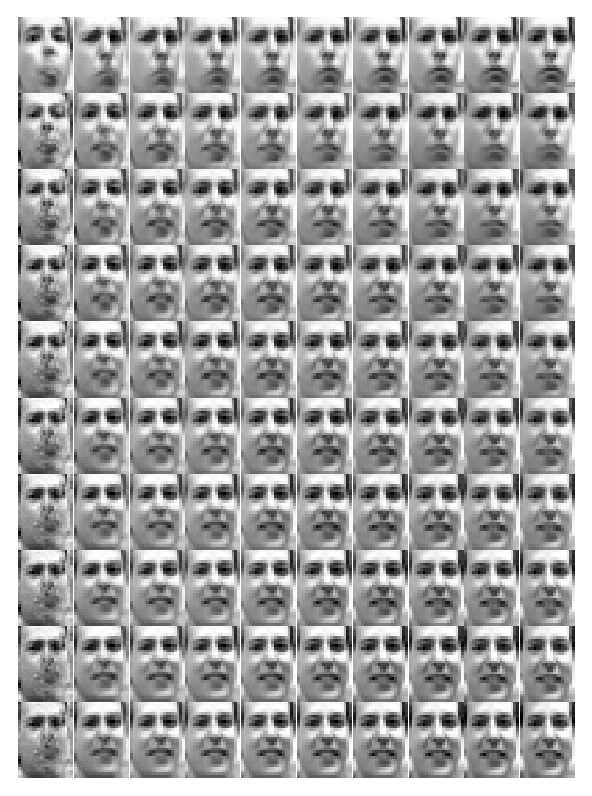

In [138]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize = (5,7))
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

for i in range(10):
    for j in range(10):
        ax1 = plt.subplot(gs1[i,j])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        noise = Variable(torch.Tensor([norm.ppf(grid[i]),norm.ppf(grid[j])])).cuda()
        im,_ = test.decode(noise)
        im = im.data.cpu().numpy()
        plt.imshow(np.reshape(im,(28,20)),cmap='gray')
        plt.axis('off')
plt.savefig('./Images/Frey.png')
plt.show()